In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

# Problem 1

__Problem:__
  
  The worker goes from home to work and back. At home he has $x$ umbrellas, at work $y$ umbrellas.
  Count avarage time untill he get wet. Show it for different $p$ - the probability of rain.

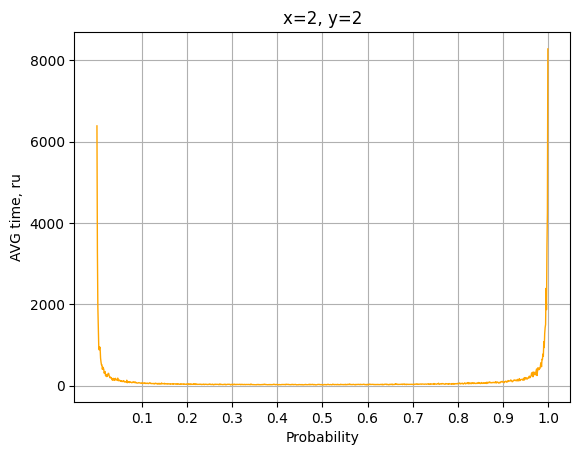

0.297


In [11]:
ts = []
x0, y0 = 2, 2
h = 1000

for p in range(1, h):
    p = p / h
    t = 0
    for _ in range(50):
        x, y = x0, y0
        while x > 0 or y > 0:
            if random.random() > p:
                if x == 0:
                    break
                x -= 1
                y += 1
            t += 1

            if random.random() > p:
                if y == 0:
                    break
                y -= 1
                x += 1
            t += 1
        
    ts.append(t / 50)


fig = plt.figure()
ax = fig.add_subplot()
ax.plot([p / 1000 for p in range(1, 1000)], ts, lw=1, color="orange")
ax.set_xlabel("Probability")
ax.set_ylabel("AVG time, ru")
ax.set_title(f"x={x0}, y={y0}")
ax.set_xticks(np.arange(0.1, 1.1, 0.1))
ax.grid("both")
plt.show()

print([p / 1000 for p in range(1, 1000)][ts.index(min(ts))])



# Problem 2

__Problem:__

How to simmulate huffle-shuffle and check it on randomness?

> Theoretic results shows that it requires 7 huffle-shuffles to do a deck random.

__One huffle-shuffle:__


In [201]:
n = 52
a = [i for i in range(1, n + 1)]
c = 0

for i in range(n):
    if random.random() > 0.5:
        c += 1

p = 0.1
l, r = 0, c
deck = []
while l < c and r < n:
    if random.random() > p:
        deck.append(a[l])
        l += 1
    else:
        deck.append(a[r])
        r += 1
        
    if not(l < c and r < n):
        break
    if random.random() > p:
        deck.append(a[r])
        r += 1
    else:
        deck.append(a[l])
        l += 1
if l < c:
    deck.extend(a[l:])
if r < n:
    deck.extend(a[r:])

print(deck)
print(len(deck))

[28, 29, 1, 30, 2, 31, 32, 33, 3, 4, 5, 34, 6, 7, 8, 35, 9, 10, 11, 36, 12, 37, 13, 38, 14, 39, 15, 40, 16, 41, 42, 43, 17, 44, 18, 45, 46, 47, 19, 20, 21, 22, 23, 48, 24, 49, 25, 50, 26, 51, 27, 52]
52


__Theoretical number of shuffles to do a random deck:__

In [246]:
n = 52
shuffle_num = 7

ans = [i for i in range(1, n + 1)]
for _ in range(shuffle_num):
    c = 0

    for i in range(n):
        if random.random() > 0.5:
            c += 1

    p = 0.1
    l, r = 0, c
    deck = []
    while l < c and r < n:
        if random.random() > p:
            deck.append(ans[l])
            l += 1
        else:
            deck.append(ans[r])
            r += 1
        if not(l < c and r < n):
            break
        if random.random() > p:
            deck.append(ans[r])
            r += 1
        else:
            deck.append(ans[l])
            l += 1
    if l < c:
        deck.extend(ans[l:c])
    if r < n:
        deck.extend(ans[r:])
    ans = deck.copy()

print(ans)
print(len(ans))

[13, 21, 30, 34, 37, 8, 45, 16, 2, 3, 10, 50, 17, 7, 22, 40, 11, 20, 28, 25, 27, 29, 43, 31, 32, 9, 52, 39, 51, 6, 18, 47, 33, 24, 15, 35, 1, 36, 19, 46, 12, 38, 23, 42, 48, 4, 5, 26, 14, 41, 49, 44]
52


It need to be checked on randomness, there are a lot of ways to do that

In [12]:
# shuffle criterion, Kendall's metric - not allowed theoretical result
# theoretical - 7 shuffles
# Kendall's statistic - 3 shuffles
# 95 cl gives too big range of values 
# 95% cl

# Problem 3

__Problem:__

There is start capital M - it is will find out later that no matter which one. Tossing a coin. 

If head, then M + 1, otherwise M - 1.

0.5 chance: 0.495 chance of heads

0.5 chance: if  $M \; mod \; 3 = 0$, then chance of heads is 0.075
            else chance of heads is 0.745

Show the trend of the M depend on time.




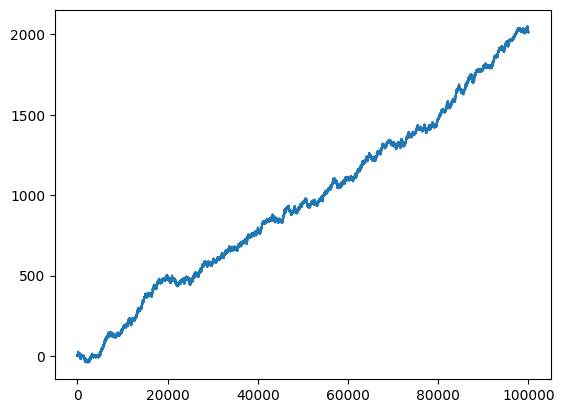

In [16]:
M = 0
i = 0
n = 100000

res = [M]
for _ in range(n):
    if random.random() > 0.5:
        if random.random() < 0.495:
            M += 1
        else:
            M -= 1
    else:
        if M % 3 == 0:
            if random.random() < 0.095:
                M += 1
            else:
                M -= 1
        else:
            if random.random() < 0.745:
                M += 1
            else:
                M -= 1
    res.append(M)

plt.plot([i for i in range(len(res))], res)
plt.show()

> Results ain't so obvious as it may seem initially.